In [18]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

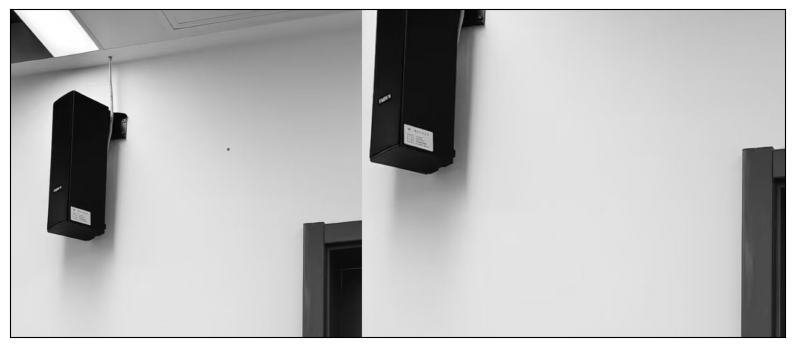

In [19]:
img1=cv.imread('SIFT-MATCH-1.jpg')
img2=cv.imread('SIFT-MATCH-2.jpg')
sift=cv.SIFT_create()
gray1=cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2=cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
merge=np.hstack((gray1, gray2))
plt.figure(figsize=(10, 8), dpi=100)
plt.imshow(merge, cmap='gray')  # 显示灰度图
plt.xticks([]), plt.yticks([])
plt.show()

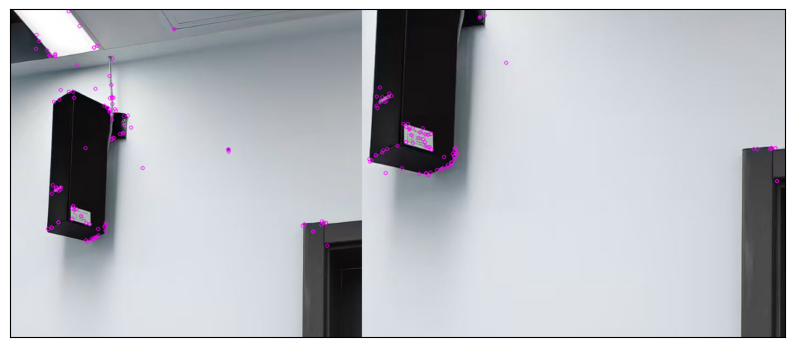

In [20]:
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
img3 = cv.drawKeypoints(img1,kp1,img1,color=(255,0,255)) #画出特征点，并显示为红色圆圈
img4 = cv.drawKeypoints(img2,kp2,img2,color=(255,0,255)) #画出特征点，并显示为红色圆圈
hmerge = np.hstack((img3, img4)) #水平拼接
plt.figure(figsize=(10, 8), dpi=100)
plt.imshow(hmerge, cmap='gray')  # 显示灰度图
plt.xticks([]), plt.yticks([])
plt.show()

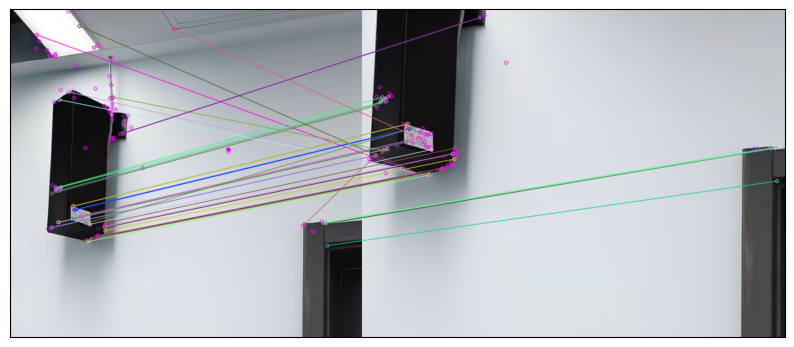

In [21]:
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
img5 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
plt.figure(figsize=(10, 8), dpi=100)
plt.imshow(img5, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()